In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 818.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 78.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 78.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 3.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.

In [26]:
import pandas as pd 
import numpy as np 
import os
import tensorflow as tf
import matplotlib.pyplot as plt 

In [27]:
from sagemaker.session import Session, get_execution_role

sagemaker_session = Session()
bucket = sagemaker_session.default_bucket()
role = get_execution_role()

In [28]:
df = pd.read_csv('cleaned_data_nostem.csv')

Let's check the content.

In [29]:
df.shape

(44888, 15)

In [30]:
df.head()

,Unnamed: 0,cleanedText,textLength,cleanedTitle,date,subject,class,weekOfYear,dayOfWeek,dayOfYear,quarter,isMonthStart,isMonthEnd,isYearStart,isYearEnd
0,0,washington the united states continue internat...,206.0,epa chief says paris climate agreement,2017-04-02,politics,0,13,6,92,2,False,False,False,False
1,1,president trump tweeted new policy us military...,57.0,breaking president trump announces major polic...,2017-07-26,politics,1,30,2,207,3,False,False,False,False
2,2,washington republican presidential candidate d...,158.0,trump says new hampshire win necessary secure ...,2016-02-07,politics,0,5,6,38,1,False,False,False,False
3,3,moscow the kremlin said thursday confident uni...,44.0,sanctions aimed turning business elite putin,2017-11-30,general,0,48,3,334,4,False,True,False,False
4,4,kellyanne conway response williams criticism c...,8.0,must kellyanne conway punches back after juan ...,2016-12-27,politics,1,52,1,362,4,False,False,False,False


In [31]:
df = df[['class','cleanedText']]
df.columns=['targetClass','article']

In [32]:
df.dropna(inplace=True)

In [33]:
df['articleLength'] = df['article'].apply(lambda x: len(x.split()))
#df['titleLength']  =df['title'].apply(lambda x: len(x.split()))

In [34]:
filter_by_text_length = (df['articleLength'] > 20) & (df['articleLength'] <=500)

In [35]:
df_filt = df[filter_by_text_length]

<AxesSubplot:ylabel='Frequency'>

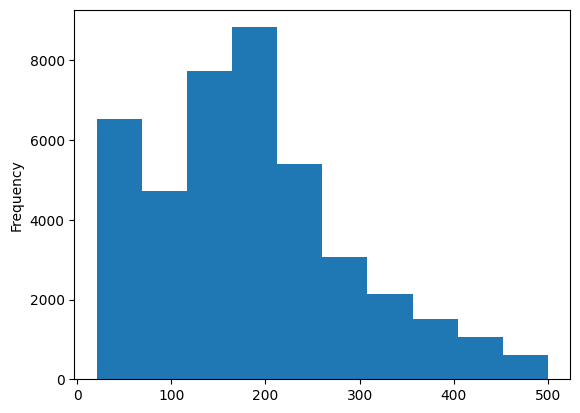

In [36]:
df_filt['articleLength'].plot(kind='hist')

In [37]:
#df_filt['titleLength'].plot(kind='hist')

In [38]:
df.drop('articleLength',axis=1,inplace=True)

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(df_filt.drop('targetClass',axis=1),
                                                 df_filt['targetClass'],
                                                 test_size=0.25,
                                                 stratify=df_filt['targetClass'],
                                                 random_state=1)

X_train,X_val, y_train,y_val = train_test_split(X_train,
                                                 y_train,
                                                 test_size=0.25,
                                                 stratify=y_train,
                                                 random_state=1)



In [43]:
X_train.reset_index(drop=True,inplace=True)
X_val.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_val.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [44]:
print(X_train)

                                                 article  articleLength
0      vienna austrian conservatives freedom party ag...            156
1      york internal state department instructions im...            243
2      hillary clinton wrong say half donald trump su...            193
3      it really get pathetic folks westboro baptist ...            243
4      washington president donald trump sought inser...            315
...                                                  ...            ...
23403  we reported trump protester grabbed rally toda...             40
23404  moscow two russian servicemen killed deir prov...             66
23405  dublin ireland minority government looked set ...            401
23406  there lot speculation president obama might lo...            263
23407  washington a report number civilian casualties...             77

[23408 rows x 2 columns]


Then, we build a tokenizer and pad sequences to 500 words.

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [46]:
text_tokenizer = Tokenizer(num_words=80000)
#title_tokenizer = Tokenizer(num_words=1000)

text_tokenizer.fit_on_texts(X_train['article'].astype(str))
#title_tokenizer.fit_on_texts(X_train['title'].astype(str))

In [48]:
from tensorflow.keras.preprocessing import sequence

In [49]:
X_train = text_tokenizer.texts_to_sequences(X_train['article'])
#title_sequences = title_tokenizer.texts_to_sequences(X_train['title'])
X_val = text_tokenizer.texts_to_sequences(X_val['article'])
X_test= text_tokenizer.texts_to_sequences(X_test['article'])

In [22]:
X_train = sequence.pad_sequences(X_train,maxlen=500, padding='post')
X_val = sequence.pad_sequences(X_val,maxlen=500, padding='post')
X_test= sequence.pad_sequences(X_test,maxlen=500, padding='post')

In [24]:
print(X_train)

[[6291 7858  580 ...    0    0    0]
 [ 139 1298   12 ...    0    0    0]
 [  39   24 1027 ...    0    0    0]
 ...
 [5750 2085 1058 ...    0    0    0]
 [ 179  303 3141 ...    0    0    0]
 [  37   35  200 ...    0    0    0]]


Here, I am concatenating y's and x's to upload data to S3 for training, validation and test.

In [23]:
train_df = pd.concat([y_train,pd.DataFrame(X_train)], axis=1)
val_df = pd.concat([y_val,pd.DataFrame(X_val)], axis=1)
test_df = pd.concat([y_test,pd.DataFrame(X_test)],axis=1)

In [24]:
train_path = 'train.csv'
test_path = 'test.csv'
val_path = 'val.csv'

train_df.to_csv(train_path,header=False,index=False)
val_df.to_csv(val_path,header=False,index=False)
test_df.to_csv(test_path,header=False,index=False)

In [25]:
train_data = sagemaker_session.upload_data(path=train_path, bucket=bucket, key_prefix='Udayan/data')
val_data = sagemaker_session.upload_data(path=val_path, bucket=bucket, key_prefix='Udayan/data')
test_data = sagemaker_session.upload_data(path=test_path, bucket=bucket, key_prefix='Udayan/data')


## Model Training

In [24]:
input_channels = {"train":train_data, "validation":val_data}

In [25]:
from sagemaker.tensorflow import TensorFlow

In [29]:
# create a TensorFlow estimator
estimator = TensorFlow(entry_point='train_keras_lstm.py',
                       train_instance_type='ml.p2.xlarge',
                       train_instance_count=1,
                       role=role, 
                       framework_version='2.1.0',
                       py_version='py3',
                      hyperparameters={"n_epochs":3})

In [30]:
estimator.fit(input_channels)

2020-04-14 10:36:03 Starting - Starting the training job...
2020-04-14 10:36:06 Starting - Launching requested ML instances......
2020-04-14 10:37:29 Starting - Preparing the instances for training......
2020-04-14 10:38:32 Downloading - Downloading input data...
2020-04-14 10:38:44 Training - Downloading the training image............
2020-04-14 10:40:46 Training - Training image download completed. Training in progress.2020-04-14 10:40:49,230 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
2020-04-14 10:40:49,597 sagemaker-containers INFO     Invoking user script

Training Env:

{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "validation": "/opt/ml/input/data/validation",
        "train": "/opt/ml/input/data/train"
    },
    "current_host": "algo-1",
    "framework_module": "sagemaker_tensorflow_container.training:main",
    "hosts": [
        "algo-1"
    ],
    "hyperparameters": {
        "n_epochs": 3,
   

After training and validating the model (val_acc 0.987) we can deploy the model and invoke the endpoint with test data.

In [97]:
predictor = estimator.deploy(initial_instance_count=1,
                             instance_type='ml.c4.xlarge')

Using already existing model: tensorflow-training-2020-04-14-10-36-03-461


-------------!

Next:
* Split the test data in chunks 
* Concatenate predictions 
* Apply threshold to output probabilities to get predicted class
* Run accuracy score

In [100]:
splitted = np.array_split(X_test,100)

In [122]:
preds = []

In [123]:
for arr in splitted:

    preds.extend(predictor.predict(arr)['predictions'])

In [144]:
preds_df = pd.DataFrame(preds, columns=['preds'])

In [145]:
def threshold(x):
    if x < 0.5:
        return 0
    else:
        return 1

In [149]:
preds_df['preds']=preds_df['preds'].apply(threshold)

In [153]:
target_preds = pd.concat([y_test,preds_df], axis=1)

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
print(accuracy_score(target_preds['targetClass'],target_preds['preds']))

0.986639753940792


In [158]:
import pickle

with open('tokenizer.pkl','wb') as f:
    
    pickle.dump(text_tokenizer,f)